# **Title: Customer Churn Prediction Analysis Using Ensemble Techniques in Machine Learning**

**Description:** Customers are a company's most valuable asset, and maintaining customers is critical for any organisation looking to increase revenue and develop long-term meaningful relationships with customers. Furthermore, the cost of obtaining a new client is five times that of keeping an existing customer. Customer Churn/Attrition is one of the most well-known business difficulties in which consumers or subscribers discontinue doing business with a service or a firm. Ideally, they will no longer be a paying customer. A client is considered to have been churned if a certain length of time has passed since the consumer last interacted with the company. Identifying whether or not a client will churn and offering relevant information aimed at customer retention are crucial to lowering churn. Our brains cannot anticipate customer turnover for millions of clients; here is where machine learning may assist. 

**Dataset:** https://www.kaggle.com/code/kerneler/starter-wafn-usec-telco-customer-05c825b4-5/data


In [1]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pre-processing for normalizing and encoding the data
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#library for parameter tuning and feature selection
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

#model metrics
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, silhouette_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,f1_score,precision_score,recall_score,fbeta_score

#library to split data as train and test 
from sklearn.model_selection import train_test_split

#balancing data
from imblearn.over_sampling import SMOTE

#supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

#dimensionality reduction
from sklearn.decomposition import PCA

#unsupervised learning
from sklearn.cluster import KMeans



## Import the dataset

In [2]:
data = pd.read_csv("Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## EDA
Dataset comprises of 7043 observations and 21 characteristics.
Out of which one is dependent variable and rest 20 are independent variables

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


`info()` gives information about the columns and their corresponding data types.

Here, Data has float, integer and string values.

### Drop unnecessary columns

In [5]:
#dropping customer ID because it's not required
data.drop(columns=['customerID'],inplace=True)
#changing feature "TotalCharges" to numeric type
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
#Removing duplicates
data.drop_duplicates(inplace=True)
#creating a copy
data_copy = data.copy()
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [6]:
print("Description of Categorical Data: \n")
data_copy.astype('object').describe().transpose()

Description of Categorical Data: 



,count,unique,top,freq
gender,7021,2,Male,3541
SeniorCitizen,7021,2,0,5880
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
tenure,7021,73,1,591
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080


In [7]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7021.000000,7021.000000,7021.000000,7010.000000
mean,0.162512,32.469449,64.851894,2290.353388
std,0.368947,24.534965,30.069001,2266.820832
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,408.312500
50%,0.000000,29.000000,70.400000,1403.875000
75%,0.000000,55.000000,89.900000,3807.837500
max,1.000000,72.000000,118.750000,8684.800000


The `describe()` function is used for getting various summary statistics. This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

Before encoding the data, we only have 4 numerical variables out of which `SeniorCitizen` is already encoded in the dataset where, 

1: Senior Citizen

0: Not a Senior Citizen

In [8]:
#Data Cleaning
null_values=np.sum(data.isnull())
null_values

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values present in the dataset for the column TotalCharges and 

1.   List item
2.   List item

it has to be removed.

In [9]:
data.dropna(inplace = True)
data.shape

(7010, 20)

Drop the rows where there are null values. 11 rows are dropped.

### Label Encoding

In [10]:
cols = [col for col in data if data[col].dtype == 'object']

for each_col in cols:
    le = LabelEncoder()
    data[each_col] = le.fit_transform(data[each_col])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [11]:
x = data.columns.values
x = np.delete(x,len(x)-1)
x_variable = data[x]
x_variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [12]:
y_variable = data['Churn']
y_variable

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7010, dtype: int64

### Outlier 


In [13]:
numerical = [col for col in data_copy if data_copy[col].dtype != 'object'][1:]
for col in numerical:
    q1 = x_variable[col].quantile(0.25)
    q3 = x_variable[col].quantile(0.75)
    IQR = q3 - q1
    out_less = x_variable[x_variable[col] < (q1 - 1.5*IQR)]
    out_more = x_variable[x_variable[col] > (q3 + 1.5*IQR)]
    outliers = pd.concat([out_less, out_more])
    print(outliers)

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges]
Index: []


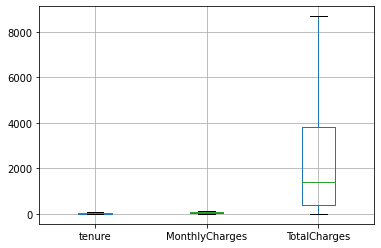

In [14]:
x_variable.boxplot(numerical)
plt.show()

There are no outliers in the dataset as shown in the boxplot. Hence, no rows need to be removed from the dataset.

> Indented block



### Visualization
1. Heat map
2. Correlation
3. Dist plot
4. Count plot

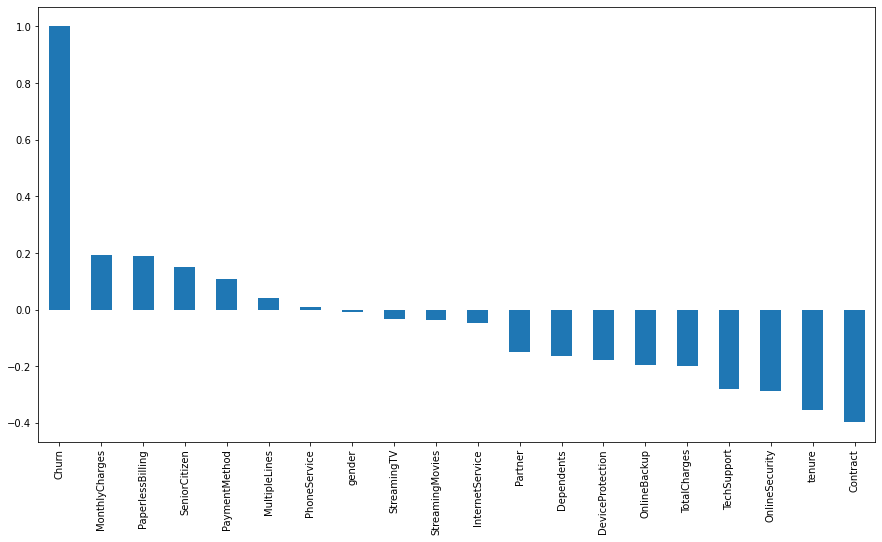

In [15]:
plt.figure(figsize=(15,8))
data.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**The** correlation of all independent columns are taken with respect to the dependent variable 'Churn' and plotted in a sorted manner.

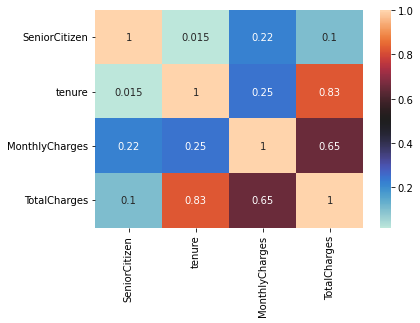

In [16]:
cor = data_copy.corr()
sns.heatmap(cor,cmap='icefire',annot=True)

Heat map for all numerical variables in the original dataset before encoding that describes correlation.

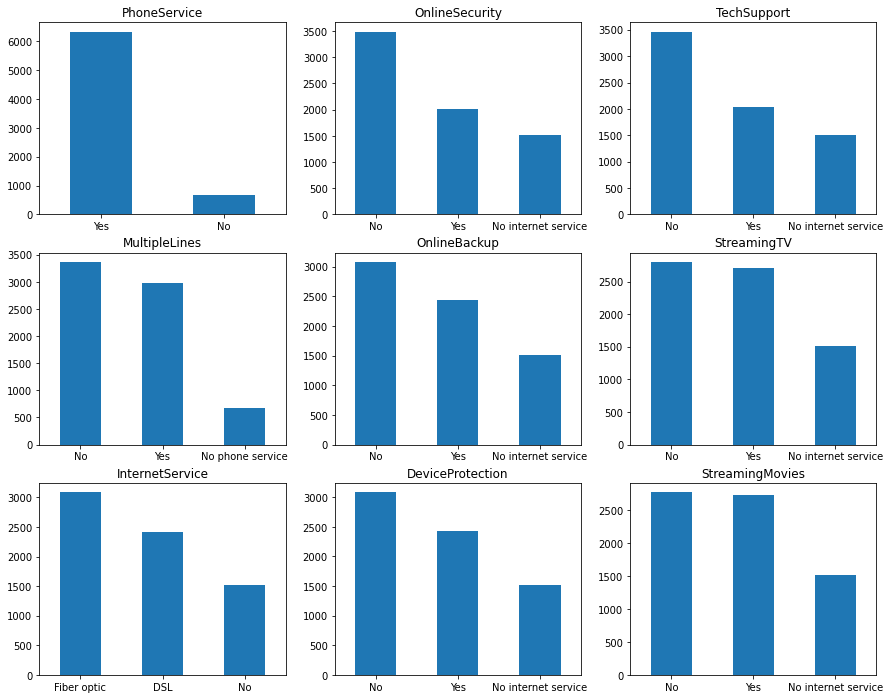

In [17]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(services):
    if i < 3:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 0)
        
    elif i >=3 and i < 6:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 0)
        
    elif i < 9:
        ax = data_copy[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 0)
    ax.set_title(item)

Bar chart for all the services used by customers.

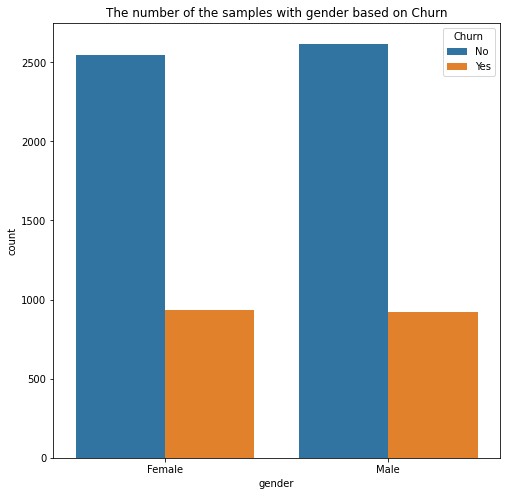

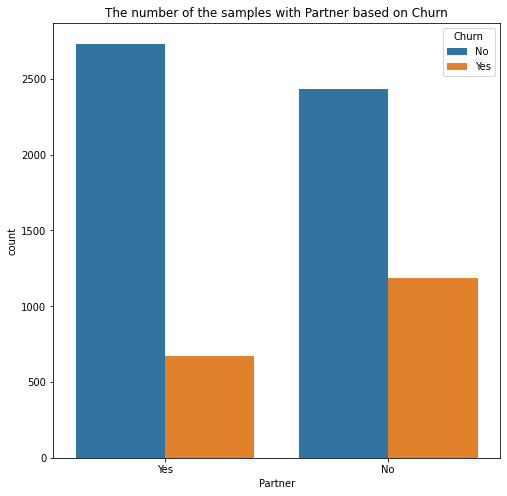

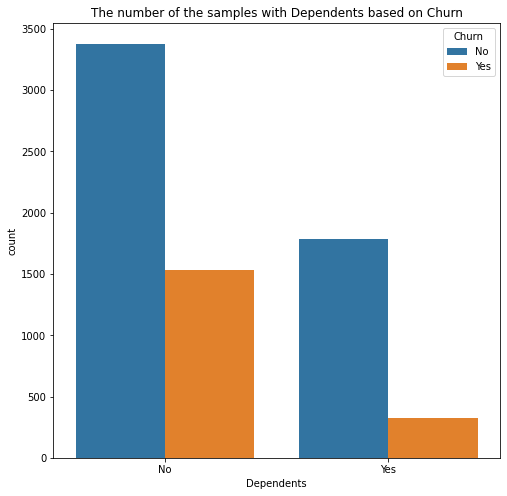

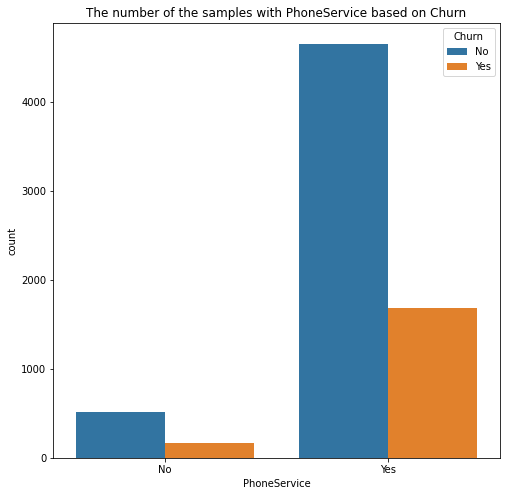

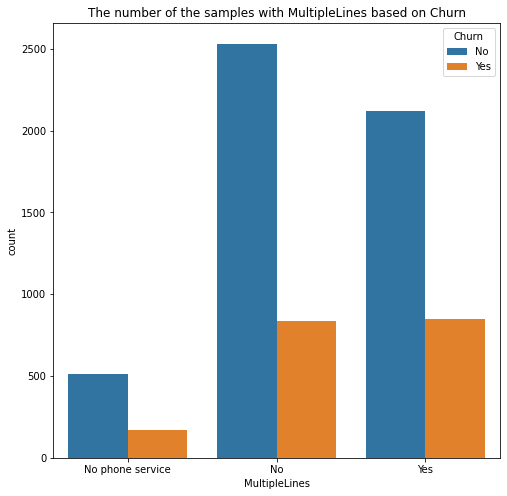

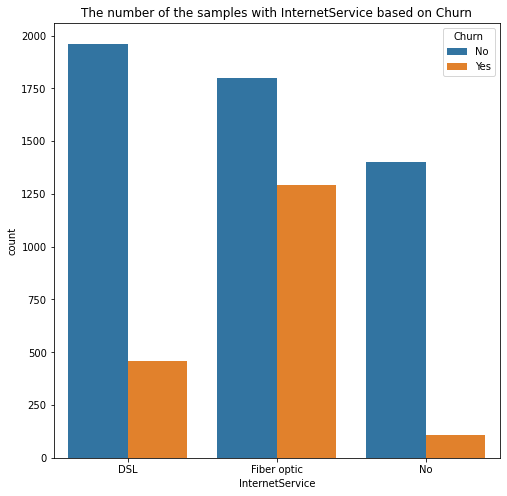

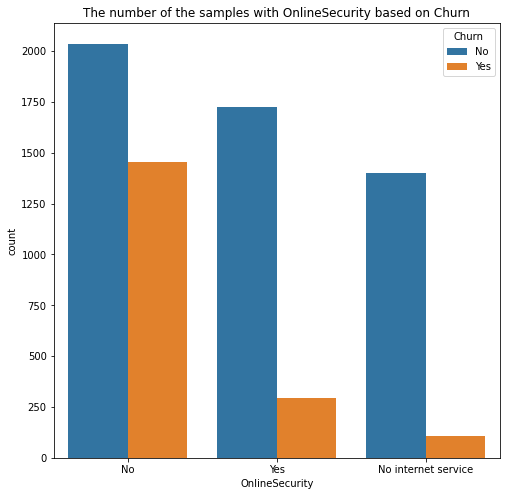

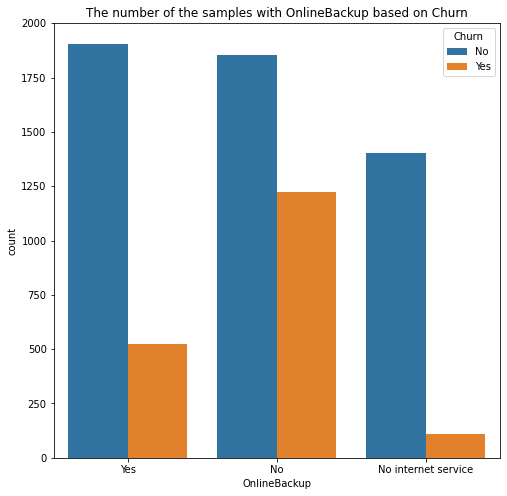

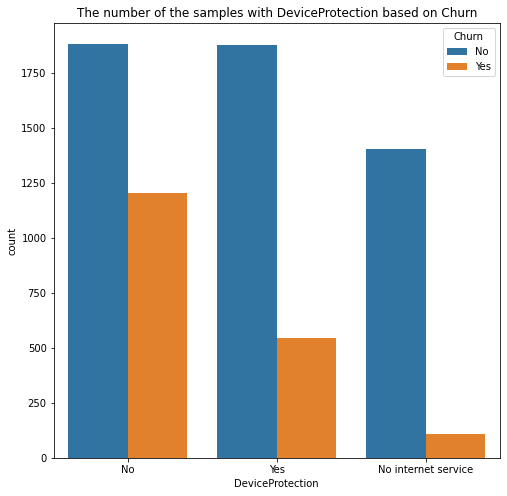

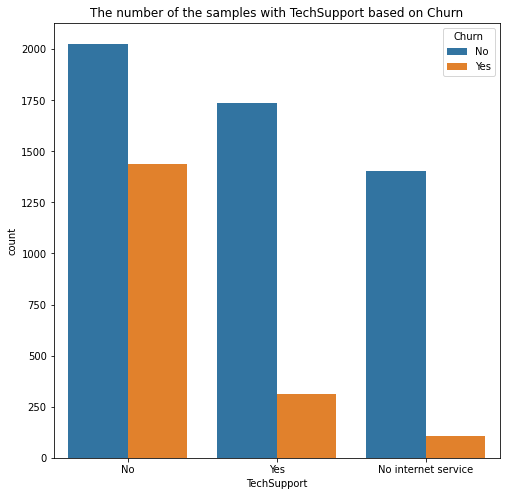

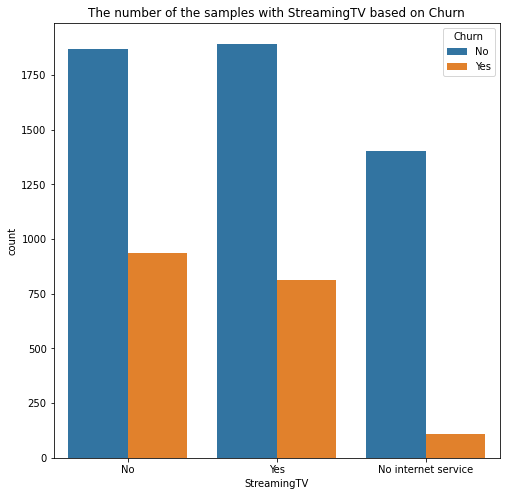

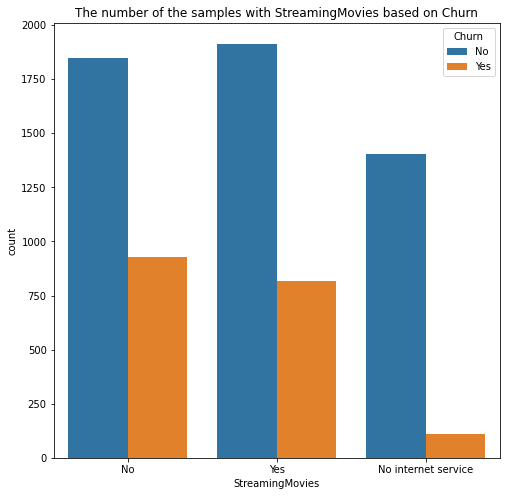

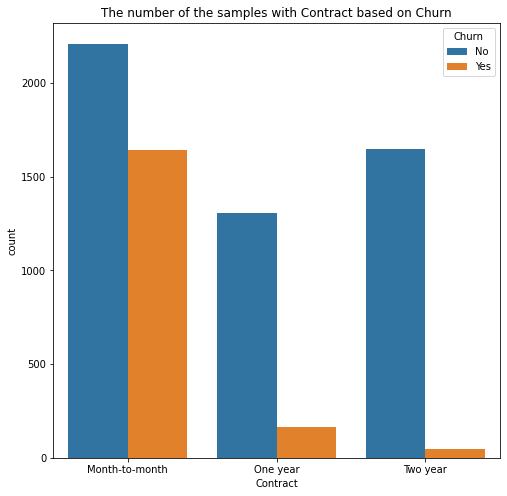

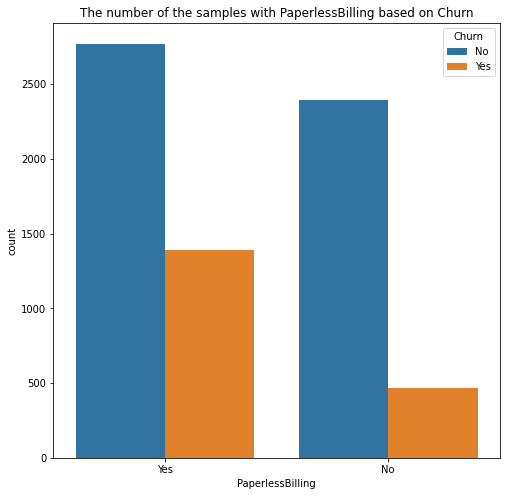

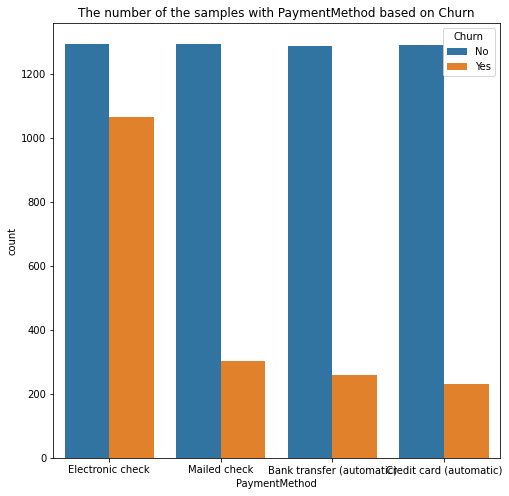

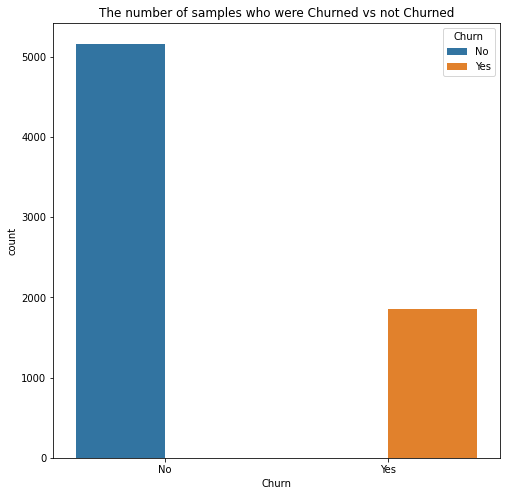

In [18]:
for i in data_copy.columns[:]:
  if (data_copy[i].dtype == 'object'):
    plt.figure(figsize=(8,8))
    sns.countplot(data = data_copy, x = i, hue = 'Churn')
    if(i == 'Churn'):
      plt.title("The number of samples who were Churned vs not Churned".format(i))
    else:
      plt.title("The number of the samples with {} based on Churn".format(i))
    plt.show()

Count plots that show whether a customer churned or not grouped by several categories. For example, shows the number of Males and Females churned.

The last plot shows the total number of customers churned vs customers who didn't churn.

### Normalization

In [19]:
#Normalization by Standard Scaler
scaler = StandardScaler()
scaler.fit(x_variable)
x_variable = scaler.transform(x_variable)
x_variable = pd.DataFrame(x_variable,columns=x)
x_variable

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008596,-0.440921,1.032482,-0.653764,-1.285566,-3.051036,0.059553,-1.181912,-0.917452,1.240732,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418,-1.165523,-0.997284
1,0.991477,-0.440921,-0.968540,-0.653764,0.060346,0.327757,-0.994654,-1.181912,1.406009,-1.028979,1.243300,-0.923902,-1.112909,-1.121811,0.371148,-1.207445,1.340759,-0.264071,-0.176848
2,0.991477,-0.440921,-0.968540,-0.653764,-1.244781,0.327757,-0.994654,-1.181912,1.406009,1.240732,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,1.340759,-0.367189,-0.962740
3,0.991477,-0.440921,-0.968540,-0.653764,0.508983,-3.051036,0.059553,-1.181912,1.406009,-1.028979,1.243300,1.394950,-1.112909,-1.121811,0.371148,-1.207445,-1.471264,-0.751387,-0.198355
4,-1.008596,-0.440921,-0.968540,-0.653764,-1.244781,0.327757,-0.994654,0.175873,-0.917452,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418,0.193308,-0.943549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7005,0.991477,-0.440921,1.032482,1.529603,-0.347506,0.327757,1.113760,-1.181912,1.406009,-1.028979,1.243300,1.394950,1.144467,1.135335,0.371148,0.828195,1.340759,0.662329,-0.132289
7006,-1.008596,-0.440921,1.032482,1.529603,1.610184,0.327757,1.113760,0.175873,-0.917452,1.240732,1.243300,-0.923902,1.144467,1.135335,0.371148,0.828195,-0.533923,1.274384,2.237896
7007,-1.008596,-0.440921,1.032482,1.529603,-0.877714,-3.051036,0.059553,-1.181912,1.406009,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,0.403418,-1.173839,-0.857607
7008,0.991477,2.267980,1.032482,-0.653764,-1.163210,0.327757,1.113760,0.175873,-0.917452,-1.028979,-1.026961,-0.923902,-1.112909,-1.121811,-0.828921,0.828195,1.340759,0.316384,-0.875188


## Balancing and splitting the data

In [20]:
sm = SMOTE(random_state=42)
x_variable, y_variable = sm.fit_resample(x_variable, y_variable)

X_train, X_test, y_train, y_test = train_test_split(x_variable, y_variable, test_size=0.3,shuffle=True,random_state=42)
X_res = X_train
y_res = y_train

## Model training

#### Logistic regression

In [21]:
model = LogisticRegression()
result = model.fit(X_res, y_res)
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.7784605433376456
0.7858705845576743
0.7508960573476703
0.8242622950819672
0.8084641111396964


Since the dataset is unbalaced, the evaluation metrics has to be F1 Score, Precision and Recall scores.While Accuracy is used for Balanced Data.

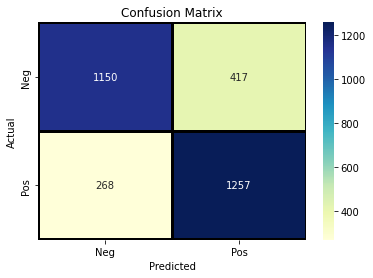


Classification Report-->

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1567
           1       0.75      0.82      0.79      1525

    accuracy                           0.78      3092
   macro avg       0.78      0.78      0.78      3092
weighted avg       0.78      0.78      0.78      3092



In [22]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)

#### Decision tree

In [23]:
model = DecisionTreeClassifier(criterion="gini",max_depth=20,class_weight="balanced")
result = model.fit(X_res, y_res)
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.7635834411384217
0.7607201309328969
0.7594771241830065
0.7619672131147541
0.7614678899082569


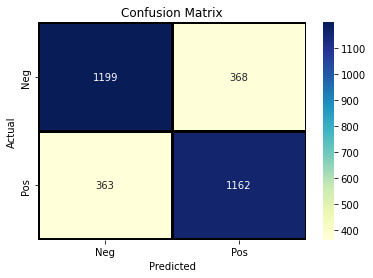


Classification Report-->

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      1567
           1       0.76      0.76      0.76      1525

    accuracy                           0.76      3092
   macro avg       0.76      0.76      0.76      3092
weighted avg       0.76      0.76      0.76      3092

0.7635834411384217


In [24]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)
print (accuracy_score(y_test, prediction_test))

#### Random forest

In [25]:
model_rf = RandomForestClassifier(n_estimators=300 ,oob_score="True", max_depth=15, random_state =42, max_features = "auto", max_leaf_nodes = 15)
model_rf.fit(X_res, y_res)
prediction_test = model_rf.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.7920439844760673
0.8012364760432767
0.7578947368421053
0.8498360655737704
0.8297055057618438


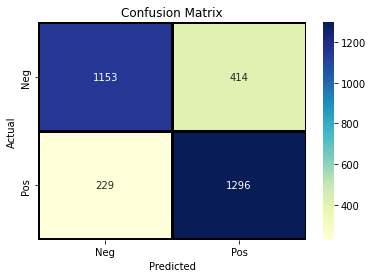


Classification Report-->

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1567
           1       0.76      0.85      0.80      1525

    accuracy                           0.79      3092
   macro avg       0.80      0.79      0.79      3092
weighted avg       0.80      0.79      0.79      3092



In [26]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


#### Naive bayes

In [27]:
model=GaussianNB()
model.fit(X_res,y_res)
prediction_test = model_rf.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.7920439844760673
0.8012364760432767
0.7578947368421053
0.8498360655737704
0.8297055057618438


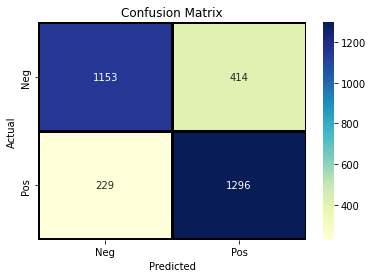


Classification Report-->

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1567
           1       0.76      0.85      0.80      1525

    accuracy                           0.79      3092
   macro avg       0.80      0.79      0.79      3092
weighted avg       0.80      0.79      0.79      3092



In [28]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


#### K Nearest Neighbours

In [29]:
K = []
training = []
test = []
scores = {}

for k in range(2, 31):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_res, y_res)

    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    K.append(k)

    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9421957305239812, 0.7804010349288486]
3 : [0.8853617965067924, 0.7826649417852523]
4 : [0.8777377321874134, 0.7816946959896507]
5 : [0.848073191017466, 0.7787839586028461]
6 : [0.8489049071250346, 0.7846054333764554]
7 : [0.8220127529803161, 0.7745795601552393]
8 : [0.8247851400055448, 0.7839586028460543]
9 : [0.8085666759079567, 0.7758732212160414]
10 : [0.810230108123094, 0.7797542043984476]
11 : [0.7963681729969504, 0.7716688227684346]
12 : [0.8034377599112836, 0.7800776196636481]
13 : [0.7920709731078459, 0.7752263906856404]
14 : [0.7951205988355975, 0.7736093143596378]
15 : [0.7868034377599112, 0.7710219922380336]
16 : [0.7886054893263099, 0.7719922380336351]
17 : [0.7826448572220682, 0.7664941785252264]
18 : [0.7837538120321597, 0.7703751617076326]
19 : [0.7766842251178264, 0.7629366106080206]
20 : [0.7790407540892709, 0.7697283311772316]
21 : [0.7732187413362905, 0.7613195342820182]
22 : [0.7762683670640421, 0.7671410090556274]
23 : [0.7697532575547547, 0.7629366106080206

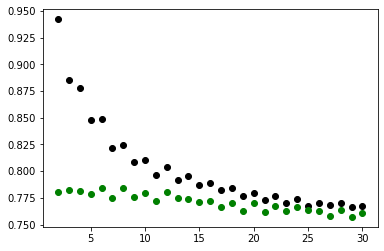

In [30]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [31]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(X_res, y_res)
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.7609961190168176
0.7857349956509133
0.7042619542619543
0.8885245901639345
0.8443419740777667


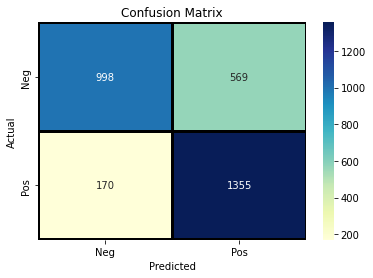


Classification Report-->

              precision    recall  f1-score   support

           0       0.85      0.64      0.73      1567
           1       0.70      0.89      0.79      1525

    accuracy                           0.76      3092
   macro avg       0.78      0.76      0.76      3092
weighted avg       0.78      0.76      0.76      3092



In [32]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


#### Support Vector Machine

In [33]:
SVC_Model = SVC()
SVC_Model.fit(X_res, y_res)
SVC_Model_Predict = SVC_Model.predict(X_test)

# Print the prediction accuracy
print(accuracy_score(y_test,SVC_Model_Predict))
print (f1_score(y_test, SVC_Model_Predict))
print (precision_score(y_test, SVC_Model_Predict))
print (recall_score(y_test, SVC_Model_Predict))
print (fbeta_score(y_test, SVC_Model_Predict,beta=2))

0.8020698576972833
0.8071833648393194
0.7768344451182535
0.84
0.8265582655826559


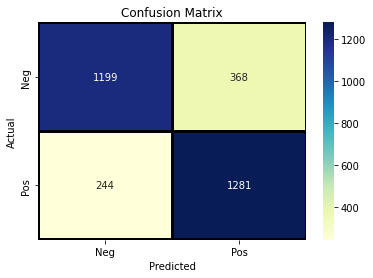


Classification Report-->

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1567
           1       0.78      0.84      0.81      1525

    accuracy                           0.80      3092
   macro avg       0.80      0.80      0.80      3092
weighted avg       0.80      0.80      0.80      3092



In [34]:
cm = confusion_matrix(y_test,SVC_Model_Predict)
cr = classification_report(y_test,SVC_Model_Predict)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)

#### Ada Boost Classifier

In [35]:
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_res,y_res)
preds = model.predict(X_test)

# Print the prediction accuracy
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))
print (precision_score(y_test, preds))
print (recall_score(y_test, preds))
print (fbeta_score(y_test, preds,beta=2))

0.8195342820181113
0.8221797323135757
0.7997520148791073
0.8459016393442623
0.8362504861921433


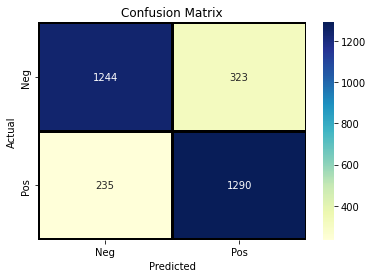


Classification Report-->

              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1567
           1       0.80      0.85      0.82      1525

    accuracy                           0.82      3092
   macro avg       0.82      0.82      0.82      3092
weighted avg       0.82      0.82      0.82      3092



In [36]:
cm = confusion_matrix(y_test,preds)
cr = classification_report(y_test,preds)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)

#### XG Boost

In [37]:
model = XGBClassifier()
model.fit(X_res, y_res)
prediction_test = model.predict(X_test)

# Print the accuracy score
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.8392626131953428
0.8425720620842573
0.8149509803921569
0.8721311475409836
0.8600620796689085


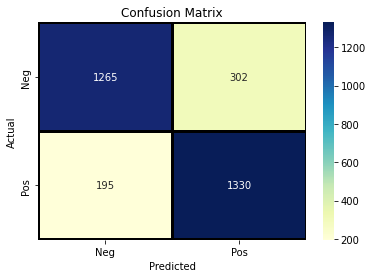


Classification Report-->

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1567
           1       0.81      0.87      0.84      1525

    accuracy                           0.84      3092
   macro avg       0.84      0.84      0.84      3092
weighted avg       0.84      0.84      0.84      3092



In [38]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)


#### Multi-Layer Perceptron

In [39]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction_test = mlp.predict(X_test)

# Print the accuracy score
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))
print (precision_score(y_test, prediction_test))
print (recall_score(y_test, prediction_test))
print (fbeta_score(y_test, prediction_test,beta=2))

0.8179172056921087
0.8243369734789391
0.7863095238095238
0.8662295081967213
0.8489717223650386


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


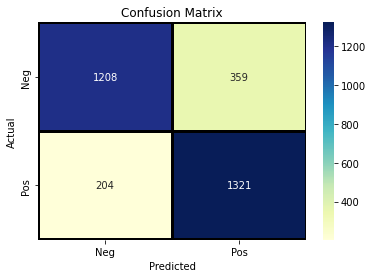


Classification Report-->

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1567
           1       0.79      0.87      0.82      1525

    accuracy                           0.82      3092
   macro avg       0.82      0.82      0.82      3092
weighted avg       0.82      0.82      0.82      3092



In [40]:
cm = confusion_matrix(y_test,prediction_test)
cr = classification_report(y_test,prediction_test)
ax=plt.subplot();
sns.heatmap(cm, annot=True, fmt='d', linewidths=2, linecolor='black', cmap='YlGnBu',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_ylim(2.0,0)
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Neg','Pos'])
ax.yaxis.set_ticklabels(['Neg','Pos'])
plt.show()
print()
print('Classification Report-->\n')
print(cr)

#### K Means Clustering

In [41]:
kmeans = KMeans(n_clusters= 2) 
#predict the labels of clusters.

label = kmeans.fit_predict(x_variable)
print(silhouette_score(x_variable,label))
print(accuracy_score(label,y_variable))
print (f1_score(label,y_variable))

0.16570318738993595
0.6599068503784203
0.7013717304251512


## Result (Model Training)
After analysing the performance of various Machine Learning models to predict the Churn rate we observe that the Ensemble models- XG Boost ,Ada Boost and MLP works the best.

## Dimensionality Reduction using PCA
1. Reduces Overfitting: Less redundant data means less possibility of making decisions based on redundant data/noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3. Reduces Training Time: Less data means that algorithms train faster.

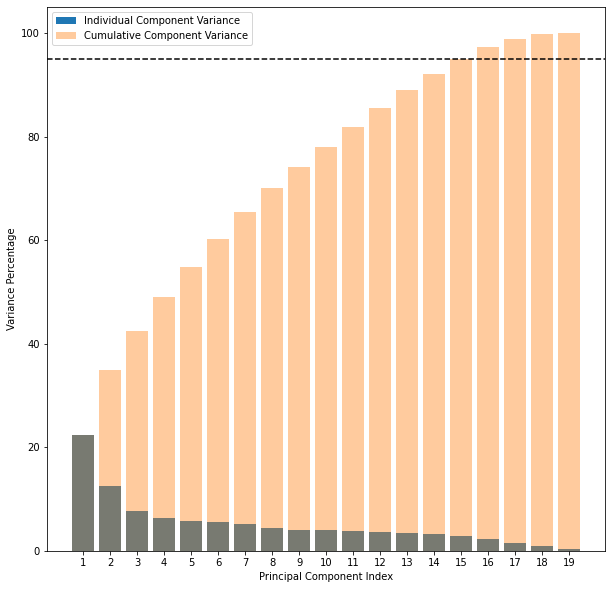

In [42]:
pca = PCA(n_components=None)
pca.fit(x_variable)
var = pca.explained_variance_ratio_ * 100
cum_var = np.cumsum(var)
plt.figure(figsize=(10,10))
plt.bar(range(1,20), var, align="center", label="Individual Component Variance")
plt.bar(range(1,20), cum_var, align="center", label="Cumulative Component Variance",alpha=0.4)

plt.ylabel("Variance Percentage")
plt.xlabel("Principal Component Index")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.axhline(y=95,color="black",linestyle="--")
plt.legend(loc='best')
plt.show()

Therefore from the above graph we can see that 16 features covers almost 95% of variance in data. So we can fix the components as 16.

In [43]:
pca_1 = PCA(n_components=0.95)
pca_1.fit(x_variable)
pca_x = pca_1.transform(x_variable)
pca_x.shape
print(pca_1.n_features_in_)

19


In [44]:
pca_1.n_components_

16

#### Estimation of number of components using PCA and accuracy score of a ML model

In [45]:
accuracy = list()
for i in range(1,20):
    pca_1 = PCA(n_components=i)
    pca_1.fit(x_variable)
    pca_x = pca_1.transform(x_variable)

    X_train, X_test, y_train, y_test = train_test_split(pca_x, y_variable, test_size=0.3,shuffle=True,random_state=42)
    model = LogisticRegression()
    result = model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    
    # Print the prediction accuracy
    accuracy.append((accuracy_score(y_test, prediction_test))*100)

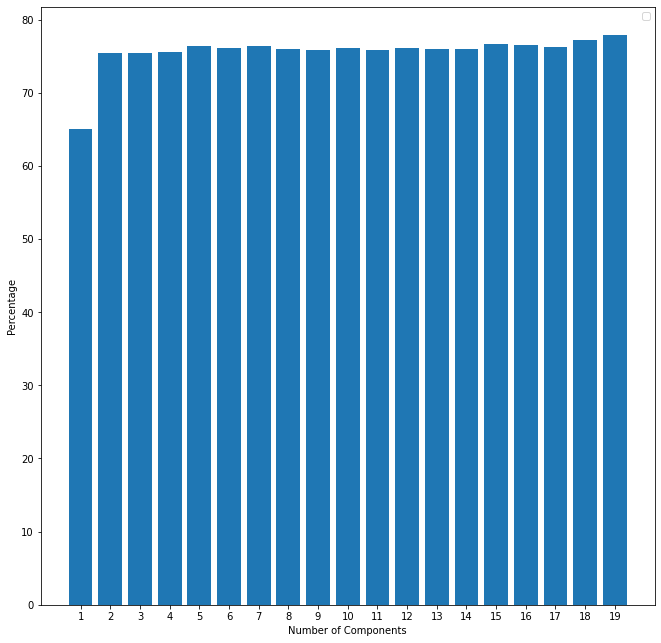

In [46]:
plt.figure(figsize=(11,11))
plt.bar(range(1,20), accuracy, align="center")
plt.ylabel("Percentage")
plt.xlabel("Number of Components")
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.legend(loc='best')
plt.show()

From the above graph we can infer that accuracies are almost uniform in the range of components. Therefore we can cut down the number of components, reduce training time and complexity of calculation.

#### Splitting data after PCA

In [47]:
X_train, X_test, y_train, y_test = train_test_split(pca_x, y_variable, test_size=0.3,shuffle=True,random_state=42)

### Model training after PCA

#### Logistic Regression

In [48]:
model = LogisticRegression()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

# Print the prediction accuracy
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))

0.7784605433376456
0.7858705845576743


#### Decision tree

In [49]:
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7629366106080206
0.7610042386697098


#### Random Forest

In [50]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.8373221216041398
0.837584759444624


#### Naive Bayes Classifier

In [51]:
model=GaussianNB()
model.fit(X_train,y_train)
prediction_test = model_rf.predict(X_test)

print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.8373221216041398
0.837584759444624


#### K Nearest Neighbours

In [52]:
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)
prediction_test = model.predict(X_test)

print (accuracy_score(y_test, prediction_test))
print(f1_score(y_test, prediction_test))

0.7697283311772316
0.790341578327444


#### ADA Boost

In [53]:
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))

0.7829883570504528
0.7886614173228346


#### XG Boost

In [54]:
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))

0.7904269081500647
0.7969924812030076


#### Support Vector Machine

In [55]:
SVC_Model = SVC()
SVC_Model.fit(X_train, y_train)
SVC_Model_Predict = SVC_Model.predict(X_test)

print(accuracy_score(y_test,SVC_Model_Predict))
print (f1_score(y_test, SVC_Model_Predict))

0.8020698576972833
0.8073047858942066


#### Multi Layer Percerptron

In [56]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction_test = mlp.predict(X_test)

# Print the accuracy score
print (accuracy_score(y_test, prediction_test))
print (f1_score(y_test, prediction_test))

0.8098318240620958
0.8139240506329114


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### K Means Clustering

In [57]:
kmeans = KMeans(n_clusters= 2) 
#predict the labels of clusters.

label = kmeans.fit_predict(x_variable)
print(silhouette_score(x_variable,label))
print(accuracy_score(label,y_variable))
print (f1_score(label,y_variable))

0.16562201843546326
0.6604890355132932
0.7017304577614866


## Result (Model Training after PCA)
After analysing the performance of various Machine Learning models after dimensionality reduction, to predict the Churn rate we observe that the Naive Bayes, Random Forest and MLP works the best.

## Model Training (Hyper-Parameter Tuning)

#### Logistic Regression

In [58]:
model = LogisticRegression()

grid_vals = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1]}
grid_lr = GridSearchCV(estimator=model, param_grid=grid_vals, scoring='accuracy',cv=6) 

#Training and Prediction
grid_lr.fit(X_train, y_train)
preds = grid_lr.best_estimator_.predict(X_test)
print(accuracy_score(y_test,preds))

0.7784605433376456


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solver l

In [59]:
logistic = LogisticRegression() 
model = logistic.fit(X_train, y_train)

# Predicted probability of 2 classes
y_predict_prob = model.predict_proba(X_test)

# Predicted probability of class 1
y_predict_prob_class_1 = y_predict_prob[:,1]
t=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# Classification based on Self-defined threshold
for i in t:
  y_predict_class = [1 if prob > i else 0 for prob in y_predict_prob_class_1]
  print("Accuracy:", round(accuracy_score(y_test, y_predict_class), 3),"  Threshold Value:",i)

Accuracy: 0.661   Threshold Value: 0.1
Accuracy: 0.719   Threshold Value: 0.2
Accuracy: 0.745   Threshold Value: 0.3
Accuracy: 0.761   Threshold Value: 0.4
Accuracy: 0.778   Threshold Value: 0.5
Accuracy: 0.772   Threshold Value: 0.6
Accuracy: 0.754   Threshold Value: 0.7
Accuracy: 0.689   Threshold Value: 0.8
Accuracy: 0.524   Threshold Value: 0.9


Logistic Regression works well for the threshold value of 0.5

#### K-Nearest Neighbours

In [62]:
scores = {}

for k in range(2, 31):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    prediction_test = clf.predict(X_test)
    scores[k] = accuracy_score(y_test, prediction_test)
for keys, values in scores.items():
    print(keys, ':', values)

2 : 0.7804010349288486
3 : 0.7829883570504528
4 : 0.7820181112548512
5 : 0.7787839586028461
6 : 0.7846054333764554
7 : 0.7745795601552393
8 : 0.7839586028460543
9 : 0.7758732212160414
10 : 0.7797542043984476
11 : 0.7716688227684346
12 : 0.7800776196636481
13 : 0.7752263906856404
14 : 0.7736093143596378
15 : 0.7710219922380336
16 : 0.7719922380336351
17 : 0.7664941785252264
18 : 0.7703751617076326
19 : 0.7629366106080206
20 : 0.7697283311772316
21 : 0.7613195342820182
22 : 0.7671410090556274
23 : 0.7629366106080206
24 : 0.7668175937904269
25 : 0.7639068564036222
26 : 0.7629366106080206
27 : 0.7580853816300129
28 : 0.7635834411384217
29 : 0.7571151358344114
30 : 0.7609961190168176


The KNN algorithm works well when n_neighbours is set to 6 resulting an accuracy of 78.4%.

#### Naive Bayes

In [60]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=999)
l=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=50)}

gs_NB = GridSearchCV(estimator=l, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')
gs_NB.fit(X_train, y_train);
print(gs_NB.best_params_)
print(gs_NB.best_score_)
# predict the target on the test dataset
predict_test = gs_NB.predict(X_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

Fitting 15 folds for each of 50 candidates, totalling 750 fits
{'var_smoothing': 0.009540954763499934}
0.7766835863923242
accuracy_score on test dataset :  0.7816946959896507


#### Support Vector Machine

In [61]:
C=[0.1,0.3,0.5,0.7,0.9,1.0]
gamma=[0.1,0.3,0.5,0.7,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),cv=3,param_grid=hyper,verbose=True)
gd.fit(X_train,y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0.8332413752546864
SVC(gamma=0.5)


In [63]:
s = gd.best_estimator_.predict(X_test)
print(accuracy_score(y_test,preds))

0.7784605433376456


#### Multi-Layer Perceptron

In [64]:
#MULTI LAYER PERCEPTRON
hidden_layer_size = [1,10,20,50,100,200,300,500]
activation = ['logistic','identity','tanh','relu']
m=0
for i in hidden_layer_size:
  for j in activation:
    clf = MLPClassifier(hidden_layer_sizes=(i,), activation=j, random_state=1)
    clf.fit(X_train, y_train)
    
    if clf.score(X_test, y_test) > m:
      h=i
      a=j
      m=clf.score(X_test, y_test)
print("Layer Size:",h,"  Activation Function:",a,"  Score:",m) 

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

Layer Size: 500   Activation Function: relu   Score: 0.8473479948253557


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Final Result (Accuracy Comparison)

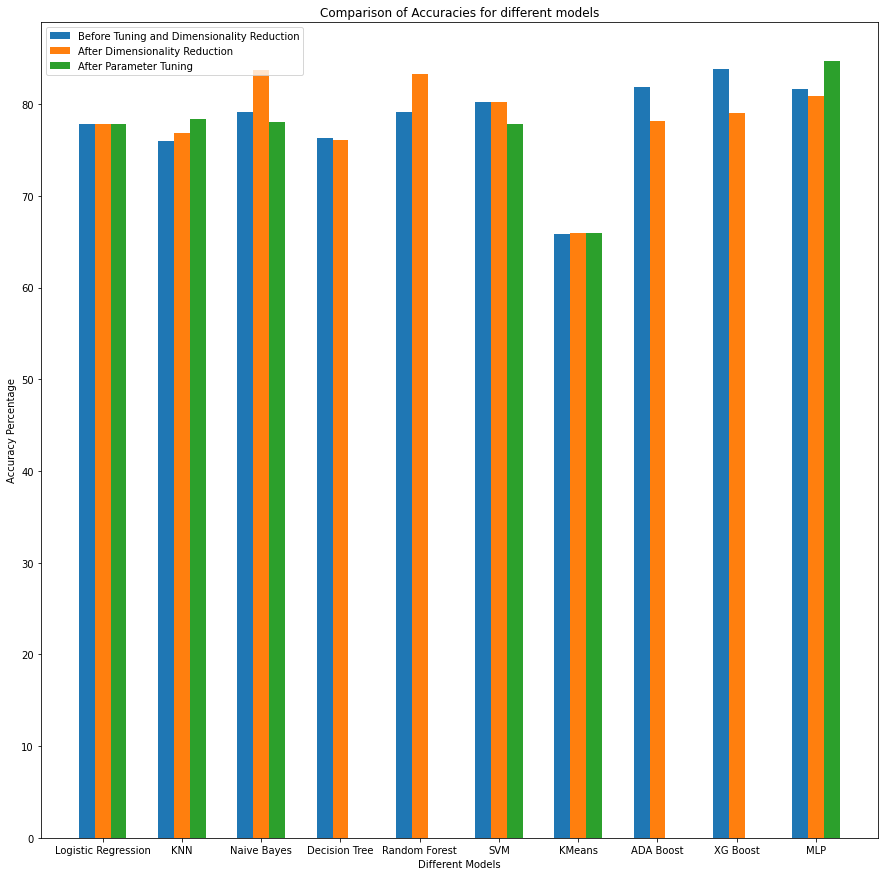

In [65]:
X = ['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest','SVM','KMeans','ADA Boost','XG Boost','MLP']
before = np.array([0.778,0.760,0.792,0.763,0.792,0.802,0.659,0.819,0.839,0.817]) 
after_dr = np.array([0.778,0.769,0.837,0.761,0.833,0.802,0.660,0.782,0.790,0.809])
after_pt = np.array([0.778,0.784,0.781,0,0,0.778,0.660,0,0,0.847])

X_axis = np.arange(len(X))
plt.figure(figsize=(15,15))
plt.bar(X_axis-0.2, before*100, 0.2, label = 'Before Tuning and Dimensionality Reduction')
plt.bar(X_axis, after_dr*100, 0.2, label = 'After Dimensionality Reduction')
plt.bar(X_axis+0.2, after_pt*100, 0.2, label = 'After Parameter Tuning')

plt.xticks(X_axis, X)
plt.xlabel("Different Models")
plt.ylabel("Accuracy Percentage")
plt.title("Comparison of Accuracies for different models")
plt.legend()
plt.show()

As you can see from the above graph average of accuracy score among different models is in the range of 70-80. MLP has an exceptional score of 84.7%. Parameter tuning can be applied for tree based algorithms also but consumes more time and processing power hence those are assigned 0. 

Therefore for the given problem statement MLP, Naive Bayes and XG Boost works well and results in better prediction than other algorithms. Also ADA Boost works well in this case and its score almost equals the above three.